# Project-->Customer Segmentation

In this project, i will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

## Read Data 

In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns
#to see graphs in the same jupyter notebook
%matplotlib inline
customer = pd.read_csv('customers.csv')
customer.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Dropping the features of channel and region in order to focus the product analysis

In [4]:
customer.drop(['Region', 'Channel'], axis = 1, inplace = True)
customer.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


## Explore Data

In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


No null values

In [6]:
customer.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


There are 440 entries in the dataset, representing different customers or transactions
#### Mean
- The mean values give you an idea of the central tendency of each product category.
- Fresh' has a mean of approximately 12,000, indicating a relatively high average spending on fresh products
#### Standard Deviation (Std)
- Higher standard deviations suggest greater variability in spending across different customers.
high standard deviations across all product categories except *frozen* suggest that customer spending varies significantly, highlighting diverse preferences and purchasing behaviors across different segments of the customer base.

In [7]:
customer.shape

(440, 6)

Sample selection - few sample data points and explore them in more detail.

In [8]:
indices = [3, 33, 333]
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(customer.loc[indices], columns = customer.keys()).reset_index(drop = True)
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,13265,1196,4221,6404,507,1788
1,29729,4786,7326,6130,361,1083
2,8565,4980,67298,131,38102,1215


Checking the z score of the selected random samples

<Axes: >

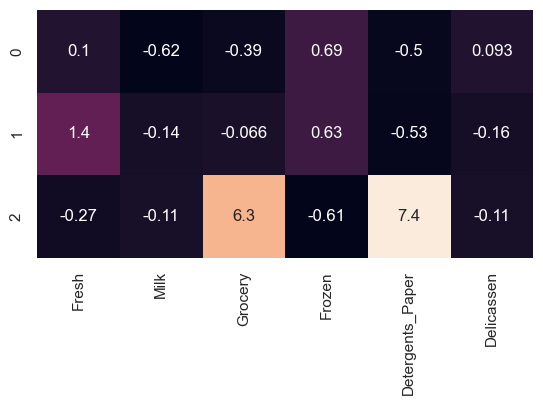

In [9]:
import seaborn as sns

sns.heatmap((samples-customer.mean())/customer.std(ddof=0), annot=True, cbar=False, square=True)

**Concept behind Z Score**
- Z-scores help identify outliers in your samples. Data points with high positive or negative Z-scores (far from zero) may be considered outliers, suggesting that they significantly deviate from the mean of the dataset
- Z-score close to zero means that the spending is close to the average spending level in the dataset.
- positive Z-score means above-average spending.
- negative Z-score means below-average spending.

#### Heat Map Analysis

- **Sample 0** consumption of delicassen and fresh are close the population mean , for those products variation is low.
- **Sample 1** consumption of milk, grocery and delicassen products are close to the mean of its population. Moreover, `Fresh` is way above the mean w.r.t other products and has variance than other products
- **Sample 2** represents a factory that uses detergents and/or paper products majorly. Moreover, it has a very high requirement of groceries as well. And if we see the heatmap we can see that Sample 2 is very different from Sample 0 and 1 specially in terms of `Grocery` and `Detergents_Paper`.

### Plotting Data 

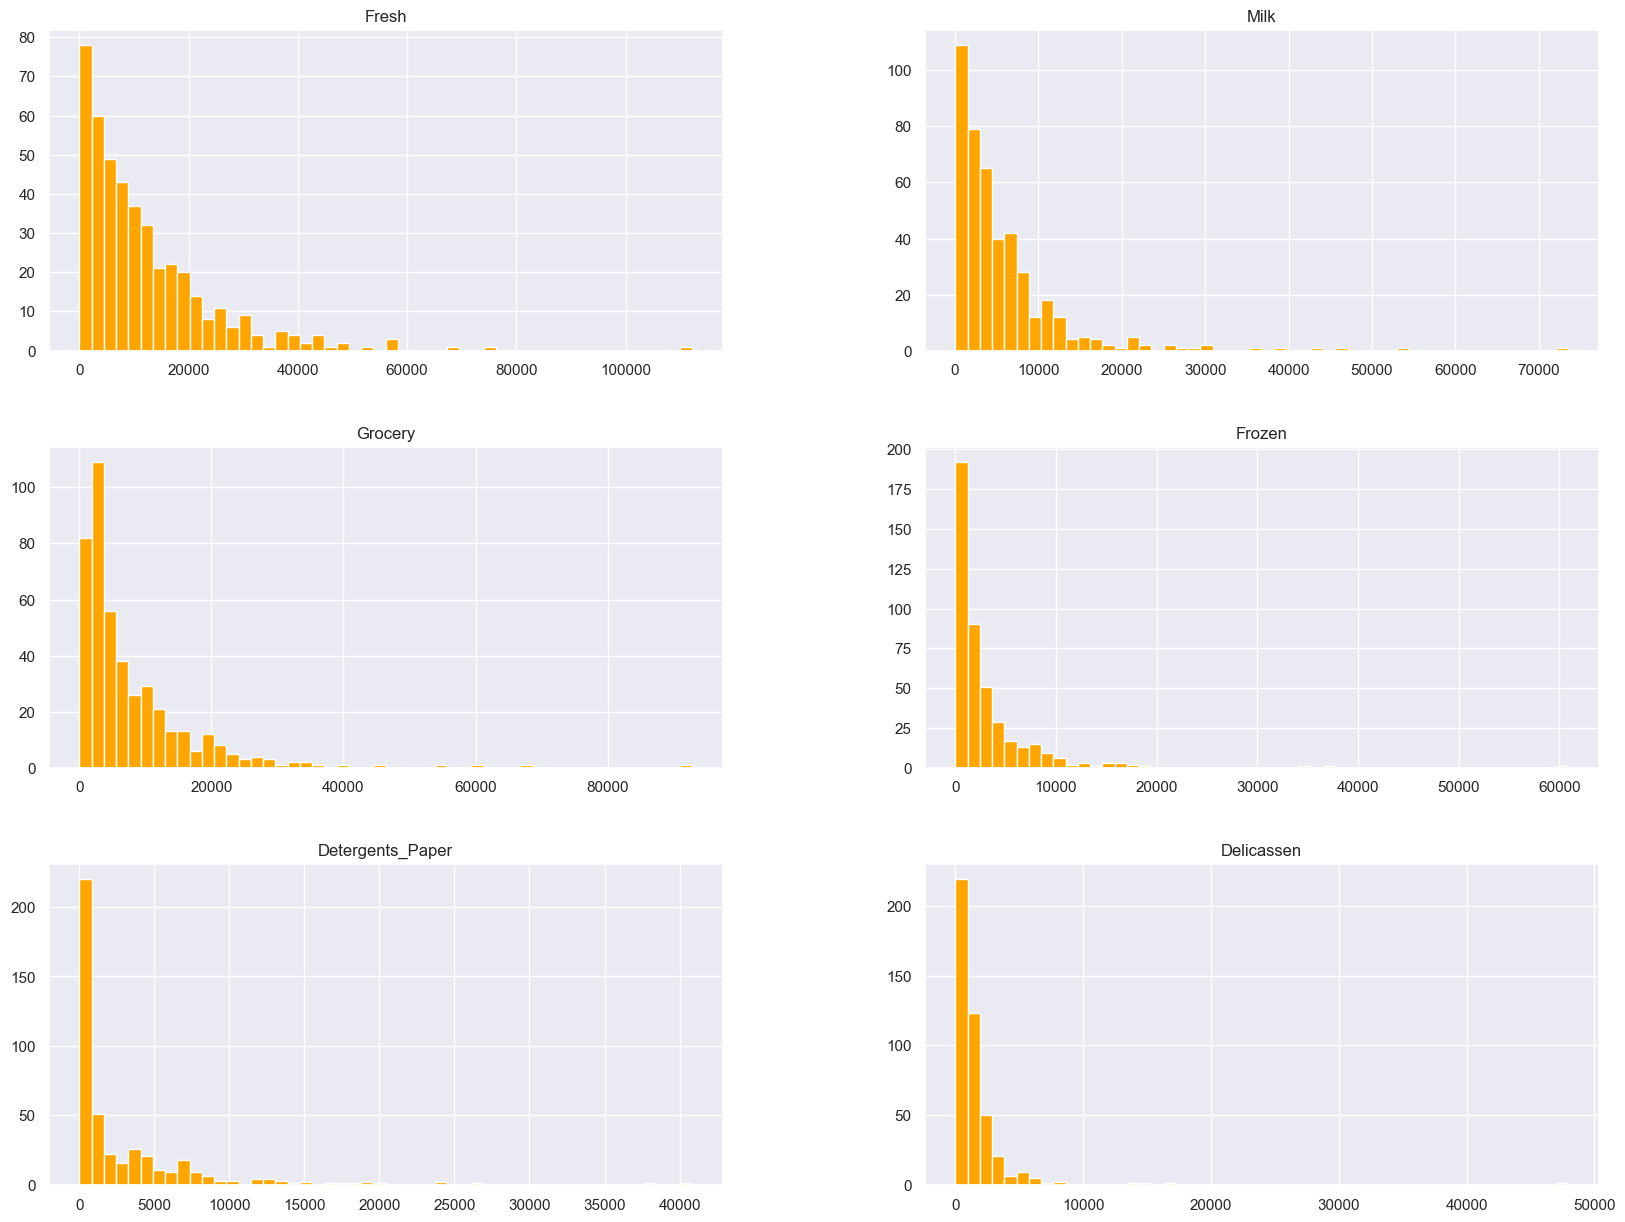

In [11]:
import matplotlib.pyplot as plt 

customer.hist(bins=50, figsize=(20,15), color = "orange")
plt.show()

### Pearson corelation test to capture the feature relevance

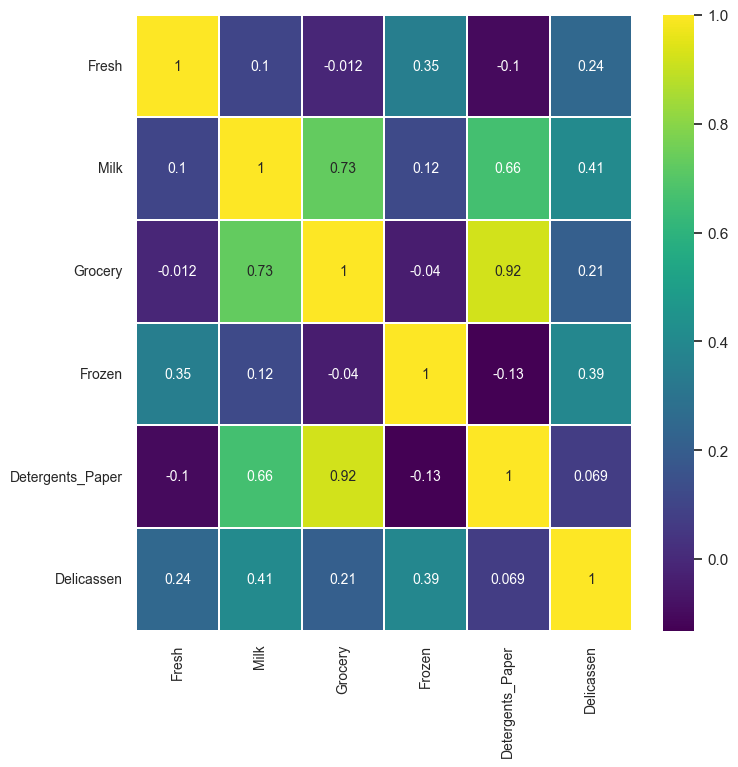

In [19]:
sns.heatmap(customer.corr(), annot=True, linewidth=0.2, annot_kws={"size":10}, cmap="viridis")
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Observation**
- The pairs *Milk-Grocery* , *Grocery-Detergents_Paper* and *Detergents_Paper-Milk* show positive correlation and they are higly corelated.
- And as for the feature selected above (*Grocery*) shows some degree of positive correlation with all the other features(except frozen and fresh). This confirms the suspicions to some extent about the relevance of the feature which I tried to predict, since *Grocery* shows a correlation with other features except *Frozen* and *Fresh* but this corelation is not a tight one.
- features are positively skewed as well looking at the plots.